In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parte 1: Numpy

1) ¿Cuál es el tamaño en bytes de un array de 1000 
elementos de tipo booleano?

In [2]:
a = np.array([True]*500+[False]*500)
print(f'Tamaño en memoria de 1000 bool type en numpy array en bytes: {a.size*a.itemsize}')

Tamaño en memoria de 1000 bool type en numpy array en bytes: 1000


2) Cree un array cuyos elementos sean los enteros pares en 
[1,100] y en orden decreciente. Muestre los 10 últimos 
por pantalla.

In [3]:
b = np.arange(0,101)[::-1]

3) Dado el array <br>
        2 4 5 6 <br>
        0 3 7 4 <br>
        8 8 5 2 <br>
        1 5 6 1 <br>

    Seleccione con una instrucción el subarray de elementos <br>
        0 3 7 4 <br>
    Después, seleccione el subarray de elementos <br>
        2 5 <br>
    8 5 <br>

In [4]:
c = np.array([[2,4,5,6],[0,3,7,4],[8,8,5,2],[1,5,6,1]])

In [5]:
c[1]

array([0, 3, 7, 4])

In [6]:
c[[0,2]][:,[0,2]]

array([[2, 5],
       [8, 5]])

4) Dados los arrays a = [1, 4, 2, 7] y b = [1, 3, 2, 9], <br>
    obtenga la media aritmética de la diferencia (a-b).

In [7]:
d, e = np.array([1,4,2,7]), np.array([1,3,2,9])

In [8]:
np.mean(d-e)

-0.25

5) Tengo valores de cordenadas (x, y) en las columnas del array <br>
    1.33 4.5 <br>
    30.0 10.7 <br>
    70.2 0.5 <br>
    Agregue a este array las coordenadas (37.1, -3.6). <br>
    Muestre en pantalla las dimensiones del nuevo array.

In [9]:
f = np.array([[1.33,4.5],[30,10.7],[70.2,0.5]])
f

array([[ 1.33,  4.5 ],
       [30.  , 10.7 ],
       [70.2 ,  0.5 ]])

In [10]:
np.vstack([f,np.array([37.1,-3.6])])

array([[ 1.33,  4.5 ],
       [30.  , 10.7 ],
       [70.2 ,  0.5 ],
       [37.1 , -3.6 ]])

6) Copie el array del ejercicio anterior. Traspóngalo <br> 
Agregue ahora dos nuevos pares de coordenadas: (10.8, 3.0) y (35.8, 12.0).

In [11]:
np.hstack([f.T,np.array([[10.8,3],[35.8,12]]).T])

array([[ 1.33, 30.  , 70.2 , 10.8 , 35.8 ],
       [ 4.5 , 10.7 ,  0.5 ,  3.  , 12.  ]])

# Parte 2: Exploración y Mineria de Datos

In [12]:
data = pd.read_csv('NucleosPoblacion.csv')

1) ¿Cuántos Municipios tienen más de 100,000 habitantes?.

In [13]:
data[data['Poblacion']>100000].shape[0]

62

2) Realice una gráfica de barras sobre la población de cada ciudad, ordenela de menor a mayo y responda: <br>
a. ¿Cuál es la segunda ciudad más poblada? <br>
b. ¿Qué posición ocupa Granada en el ranking de las ciudades más pobladas?

In [14]:
h = data.groupby(by='Provincia')['Poblacion'].sum().sort_values(ascending=False)

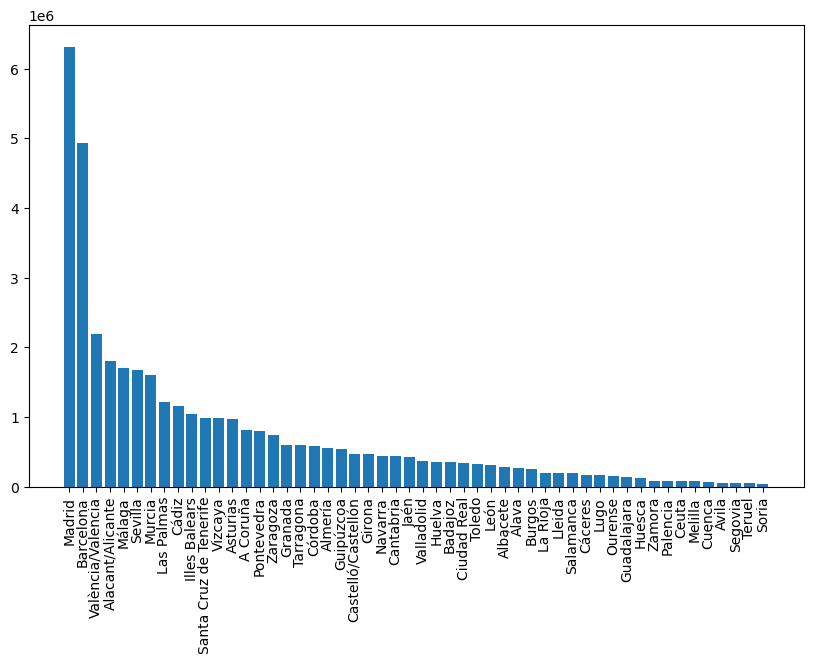

In [15]:
fig, ax = plt.subplots(figsize=(10,6))
plt.bar(h.index, h)
_ = plt.xticks(rotation=90)

In [16]:
print('La segunda ciudad mas poblada es: ',h.index[1])

La segunda ciudad mas poblada es:  Barcelona


In [17]:
rank_granada = (h>=h['Granada']).sum()

In [18]:
print(f'Granada ocupa el puesto {rank_granada} de ciudades mas pobladas')

Granada ocupa el puesto 17 de ciudades mas pobladas


3) ¿Cuántos municipios de Extremadura tienen más de 5000 habitantes?.

In [19]:
data[(data['Provincia'].isin(['Cáceres','Badajoz']))&(data['Poblacion']>5000)].shape[0]

14

4) ¿Cuál es el municipio situado más al Norte? (Usar el valor de la coordenada "Y" que representa la latitud en grados).<br>
Proporcione también la provincia a la que pertenece y su población.

In [20]:
data.loc[data['Y']==data['Y'].max(),['Municipio','Provincia','Poblacion']]

,Municipio,Provincia,Poblacion
104,Viveiro,Lugo,16211.0


5) Obtenga la media, mediana, desviación estándar, valor máximo y valor mínimo de la población de los municipios de la provincia de Granada.

In [84]:
print('Media en Granada: ',data[data['Provincia']=='Granada']['Poblacion'].mean())
print('Mediana en Granada: ',data[data['Provincia']=='Granada']['Poblacion'].median())
print('Desviación estándar en Granada: ',data[data['Provincia']=='Granada']['Poblacion'].std())
print('Valor maximo en Granada: ',data[data['Provincia']=='Granada']['Poblacion'].max())
print('Valor minimo en Granada: ',data[data['Provincia']=='Granada']['Poblacion'].min())

Media en Granada:  30217.85
Mediana en Granada:  17526.0
Desviación estándar en Granada:  50355.49171459277
Valor maximo en Granada:  239154.0
Valor minimo en Granada:  10386.0


6) Realice un histograma con la población de los Municipios para cada una de las provincias.

Text(0.5, 1.0, 'Histograma con la polación de cada municipio')

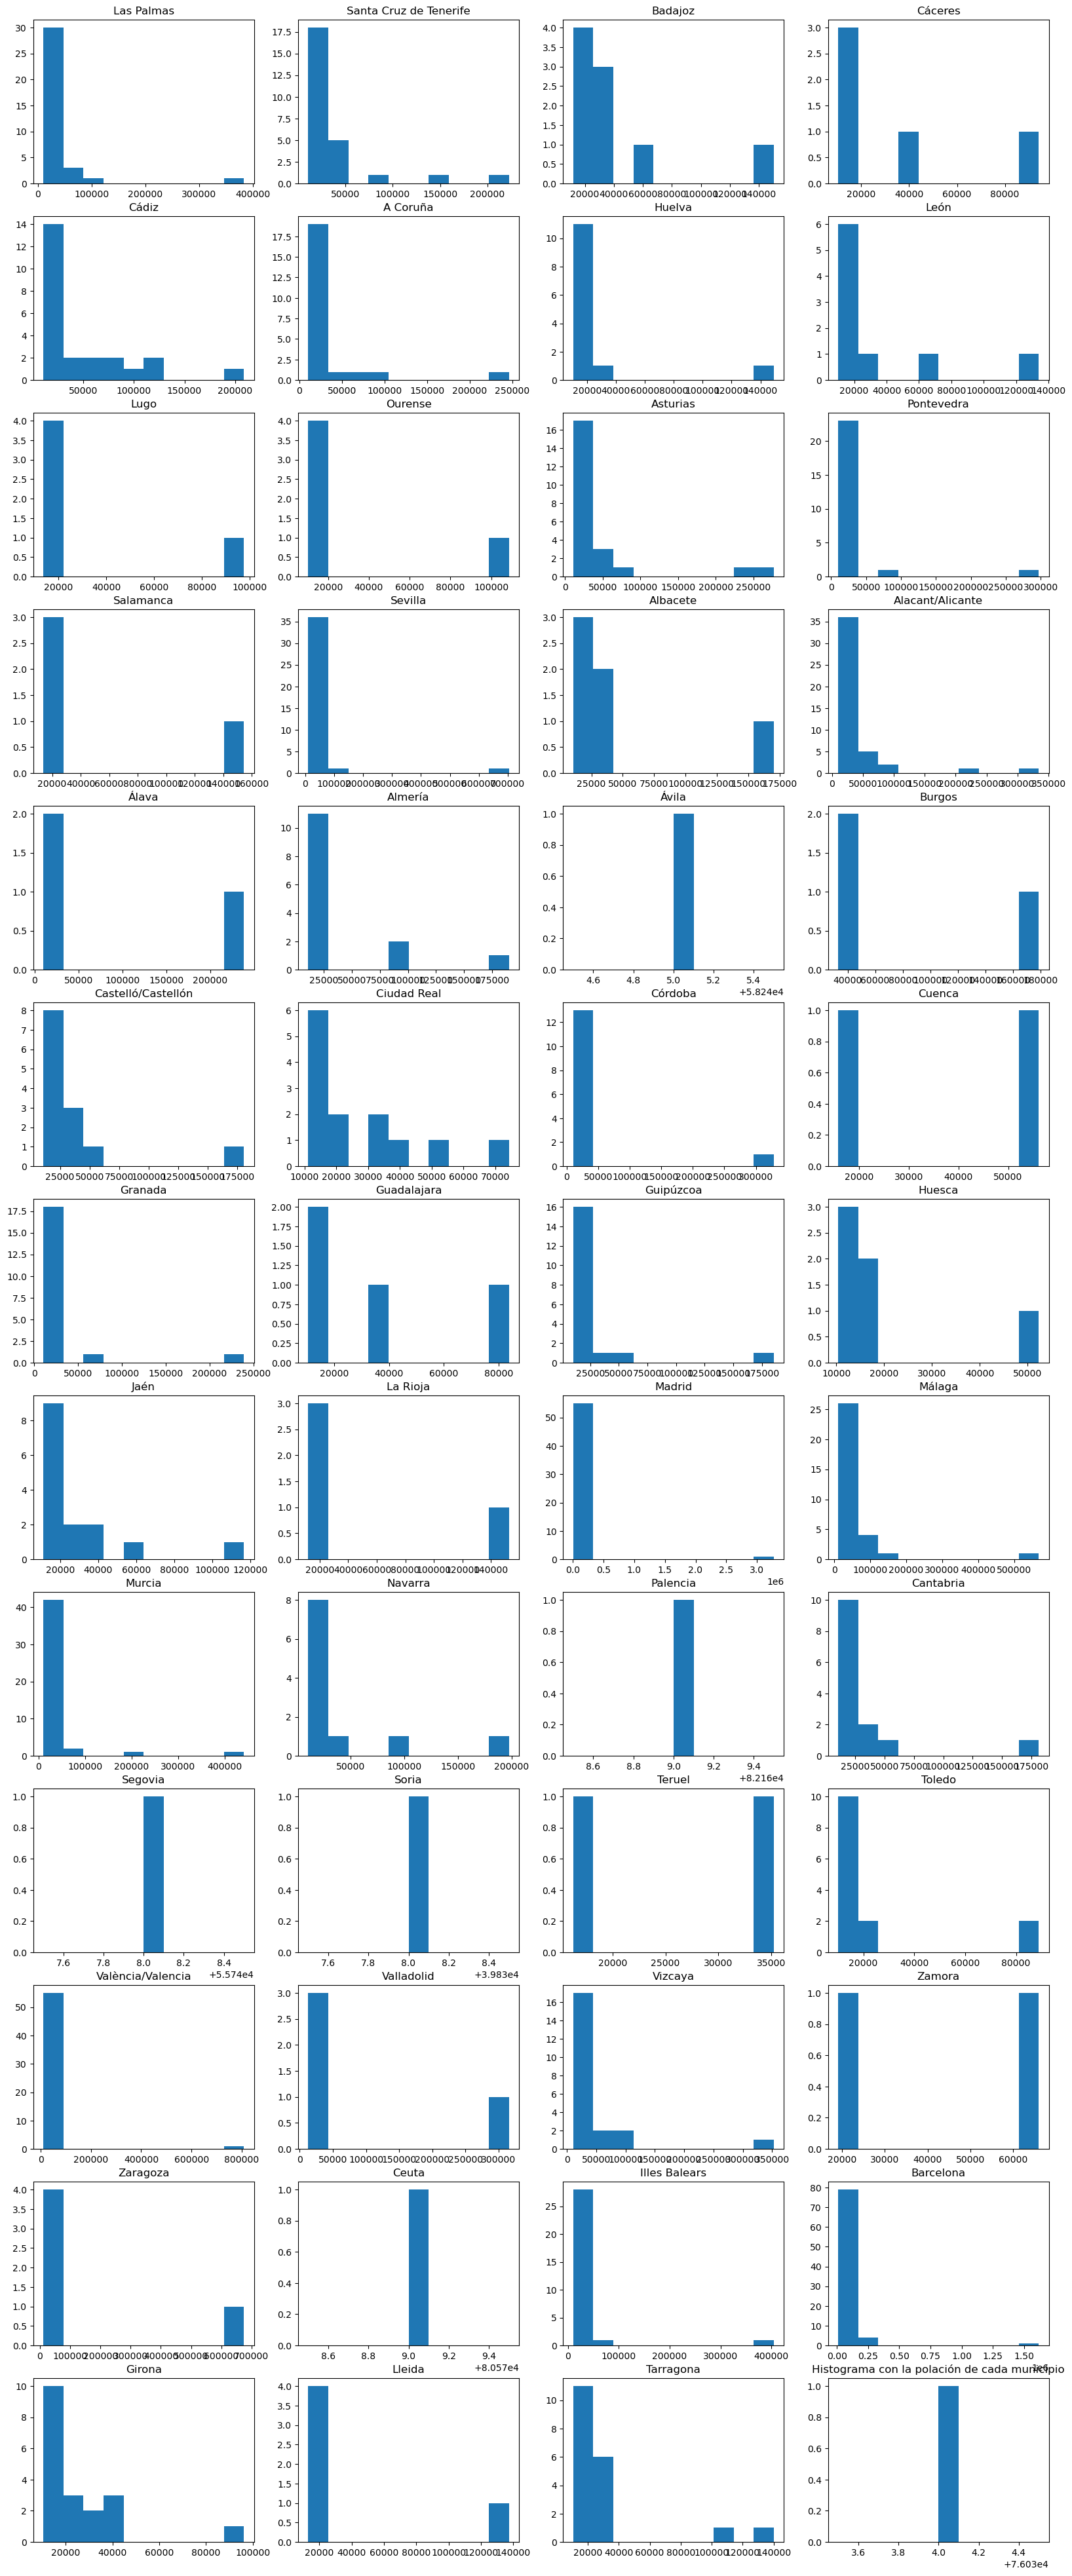

In [64]:
fig, ax = plt.subplots(nrows=int(np.ceil(len(data['Provincia'].unique()))/4),ncols=4, figsize=(20,50))
for ax_p, prov in zip(ax.flatten(),data['Provincia'].unique()):
    ax_p.hist(data[data['Provincia']==prov]['Poblacion'])
    ax_p.set_title(prov)
plt.title('Histograma con la polación de cada municipio')

7) Seleccione al azar cincuenta municipios diferentes de entre los diponibles en el archivo. <br>
Asegúrese de que no se repitan. ¿Luego calcule el promedio de la población y la desviación estándar de esto 50 municipios?.

In [96]:
data_municipios = data.groupby(by='Municipio')['Poblacion'].sum()
data_random = np.random.choice(data_municipios,size=50,replace=False)
print('Se han seleccionado 50 municipios al azar')
print('Promedio: {0:.2f}'.format(data_random.mean()))
print('Desviación estándar: {0:.2f}'.format(data_random.std()))

Se han seleccionado 50 municipios al azar
Promedio: 47896.38
Desviación estándar: 58915.03


8) Determine los nombres de los Municipios más cercano y más lejano a Madrid. <br>
Para ello debe calcular la distancia en todos ellos y Madrid. No considere a Madrid en el análisis ya que la distancia sería cero.

In [123]:
x_madrid = data.loc[data['Municipio']=='Madrid','X'].to_numpy()[0]
y_madrid = data.loc[data['Municipio']=='Madrid','Y'].to_numpy()[0]

In [124]:
data_mod = data.copy()
data_mod['distancia'] = ((data_mod['X'].sub(x_madrid))**2 + (data_mod['Y'].sub(y_madrid))**2)

In [129]:
print('Municipios mas cercanos a Madrid')
data_mod.sort_values(by='distancia')[1:10]['Municipio'].unique()

Municipios mas cercanos a Madrid


array(['Pozuelo de Alarcón', 'Getafe', 'Leganés', 'Coslada', 'Alcorcón',
       'Alcobendas'], dtype=object)

In [131]:
print('Municipios mas lejanos a Madrid')
data_mod.sort_values(by='distancia', ascending=False)[0:10]['Municipio'].unique()

Municipios mas lejanos a Madrid


array(['Los Llanos de Aridane', 'Santa Cruz de la Palma', 'Arona',
       'Adeje', 'Guía de Isora', 'Santiago del Teide',
       'San Miguel de Abona', 'Granadilla de Abona'], dtype=object)